In [2]:
import requests
import shutil
import os
import io
import json
import time
import datetime
import dateutil
import re
import pandas as pd
from IPython.display import clear_output
from pprint import pprint
import matplotlib.pyplot as plt

parent_folder='steam_data'

if not os.path.exists(parent_folder):
    os.makedirs(parent_folder)

In [3]:
# ALL LANGUAGES

csv_folder=os.path.join(parent_folder,"bulk","csv_no_text","no_preprocessing")
initial_applist_all=sorted([int(x.split('_')[0]) for x in os.listdir(csv_folder)])

csv_folder=os.path.join(parent_folder,"bulk","csv_english","no_preprocessing")
initial_applist_english=sorted([int(x.split('_')[0]) for x in os.listdir(csv_folder)])

print(len(initial_applist_all))
print(len(initial_applist_english))

5031
4907


In [117]:
# ALL LANGUAGES

json_folder=os.path.join(parent_folder,"bulk","json")
csv_folder=os.path.join(parent_folder,"bulk","csv_no_text","no_preprocessing")

if not os.path.exists(csv_folder):
    os.makedirs(csv_folder)

unexpected_keys={'review','weighted_vote_score'}

def convert_to_row_dict(review,appid):
    row_dict={'appid':int(appid)}
    for key in review:
        if 'dev' not in key and key!='review' and key!='weighted_vote_score':
            if key=='author':
                for subkey in review[key]:
                    row_dict[subkey]=review[key][subkey]
            else:
                row_dict[key]=review[key]
        elif key not in unexpected_keys:
            unexpected_keys.add(key)
            print(unexpected_keys)
    return row_dict

for bulk_file in sorted(os.listdir(json_folder)):
    appid=bulk_file.split('_')[0]
    with open(os.path.join(json_folder,bulk_file),'r') as file:
        temp_json=json.load(file)
    review_list=[convert_to_row_dict(review,appid) for review in temp_json['reviews']]
    df=pd.DataFrame(review_list)
    df.to_csv(os.path.join(csv_folder,bulk_file+".csv"),index=False)
    print(appid+": "+str(temp_json['num_reviews'])+" reviews")
    if(len(df.columns)!=18):
        print("SEARCH THIS: "+df.columns)
print("Done!")

1000080: 75 reviews
1001860: 29 reviews
1001910: 1 reviews
{'timestamp_dev_responded', 'weighted_vote_score', 'review'}
{'timestamp_dev_responded', 'weighted_vote_score', 'developer_response', 'review'}
1001980: 10 reviews
1002230: 6 reviews
1004190: 38 reviews
1004210: 30 reviews
1005930: 25 reviews
1006850: 1 reviews
1008510: 8 reviews
1008680: 4 reviews
1008870: 4 reviews
107410: 114535 reviews
108600: 19407 reviews
116100: 327 reviews
15540: 483 reviews
16900: 591 reviews
200150: 204 reviews
206500: 8906 reviews
207140: 22249 reviews
211820: 80958 reviews
214190: 4323 reviews
214420: 8607 reviews
215550: 319 reviews
215830: 2651 reviews
216174: 14 reviews
217120: 64 reviews
218980: 157 reviews
219990: 27568 reviews
220200: 53845 reviews
221100: 194166 reviews
223410: 647 reviews
223490: 829 reviews
223830: 2787 reviews
224440: 2292 reviews
224500: 3194 reviews
224740: 772 reviews
225600: 4148 reviews
226100: 696 reviews
226860: 7756 reviews
227060: 379 reviews
227160: 1428 reviews


310370: 7112 reviews
310380: 13510 reviews
310510: 1122 reviews
310560: 19436 reviews
310850: 315 reviews
310890: 771 reviews
310950: 16108 reviews
311260: 2445 reviews
311310: 4888 reviews
311800: 374 reviews
311930: 89 reviews
311980: 71 reviews
312150: 1021 reviews
312210: 864 reviews
312310: 18 reviews
312430: 237 reviews
313080: 489 reviews
313120: 20647 reviews
313130: 147 reviews
313630: 2176 reviews
314000: 1204 reviews
314010: 667 reviews
314050: 6 reviews
314230: 1174 reviews
314240: 457 reviews
314300: 47 reviews
314350: 11 reviews
314410: 2429 reviews
314520: 1464 reviews
314530: 23 reviews
314590: 68 reviews
314950: 38 reviews
314980: 578 reviews
315070: 118 reviews
315130: 56 reviews
315330: 334 reviews
315460: 2956 reviews
315540: 116 reviews
315680: 55 reviews
315840: 408 reviews
316080: 118 reviews
316370: 89 reviews
316390: 8004 reviews
316430: 1644 reviews
316930: 577 reviews
317080: 76 reviews
317440: 155 reviews
317530: 127 reviews
317730: 90 reviews
317950: 44 rev

366510: 89 reviews
366620: 38 reviews
366640: 281 reviews
366860: 33 reviews
367010: 104 reviews
367030: 55 reviews
367240: 55 reviews
367260: 31 reviews
367270: 1851 reviews
367450: 4353 reviews
367820: 10 reviews
368180: 185 reviews
368340: 5976 reviews
368680: 82 reviews
368720: 188 reviews
368860: 670 reviews
368980: 88 reviews
369080: 208 reviews
369190: 27 reviews
369270: 32 reviews
369460: 15 reviews
369530: 208 reviews
369550: 178 reviews
369560: 111 reviews
369700: 30 reviews
369990: 3565 reviews
370060: 262 reviews
370140: 6 reviews
370350: 114 reviews
370360: 2585 reviews
370390: 64 reviews
370590: 58 reviews
370750: 3 reviews
370770: 931 reviews
370810: 10 reviews
370940: 53 reviews
371010: 150 reviews
371100: 162 reviews
371120: 97 reviews
371140: 99 reviews
371200: 1242 reviews
371380: 8 reviews
371430: 70 reviews
371510: 285 reviews
371520: 768 reviews
371530: 22 reviews
372340: 6 reviews
372380: 66 reviews
372430: 16 reviews
372590: 50 reviews
372740: 67 reviews
372750:

417910: 1669 reviews
417990: 417 reviews
418000: 7 reviews
418030: 3604 reviews
418110: 164 reviews
418180: 1693 reviews
418340: 10581 reviews
418430: 16 reviews
418620: 191 reviews
418650: 1945 reviews
418910: 156 reviews
418940: 12 reviews
419020: 23 reviews
419130: 13 reviews
419480: 2290 reviews
419710: 12 reviews
420020: 40 reviews
420290: 10403 reviews
420550: 112 reviews
420880: 223 reviews
420900: 13 reviews
420910: 68 reviews
420930: 457 reviews
421030: 607 reviews
421110: 34 reviews
421650: 240 reviews
422020: 45 reviews
422030: 14 reviews
422210: 29 reviews
422300: 20 reviews
422420: 525 reviews
422510: 3 reviews
422590: 45 reviews
422860: 181 reviews
422940: 122 reviews
423180: 18 reviews
423490: 335 reviews
423620: 444 reviews
423710: 265 reviews
423730: 9 reviews
423780: 8 reviews
423810: 524 reviews
423890: 603 reviews
424030: 1167 reviews
424040: 23 reviews
424310: 1 reviews
424370: 3410 reviews
424830: 406 reviews
424850: 20 reviews
425230: 26 reviews
425260: 13 review

468920: 1152 reviews
469600: 1868 reviews
469710: 34 reviews
469820: 5052 reviews
469830: 507 reviews
470040: 74 reviews
470270: 274 reviews
470280: 25 reviews
470310: 627 reviews
470470: 40 reviews
470490: 13 reviews
470600: 655 reviews
471220: 7 reviews
471400: 14 reviews
471710: 3430 reviews
471730: 22 reviews
471770: 60 reviews
472720: 6 reviews
473140: 67 reviews
473730: 161 reviews
473770: 1202 reviews
473910: 173 reviews
474880: 1 reviews
474890: 56 reviews
475430: 422 reviews
475490: 478 reviews
475530: 22 reviews
475960: 67 reviews
476020: 151 reviews
476030: 46 reviews
476670: 6 reviews
476700: 369 reviews
476930: 66 reviews
477140: 53 reviews
477170: 45 reviews
477180: 91 reviews
477730: 930 reviews
477910: 8 reviews
479000: 39 reviews
479010: 95 reviews
479020: 79 reviews
479180: 26 reviews
479200: 11 reviews
480500: 11 reviews
480710: 2 reviews
481190: 275 reviews
481870: 298 reviews
482440: 38 reviews
482460: 10 reviews
483490: 5 reviews
483680: 47 reviews
483850: 30 revi

525640: 479 reviews
525680: 163 reviews
525760: 10 reviews
525870: 4 reviews
525980: 1 reviews
526130: 23 reviews
526160: 3656 reviews
526240: 44 reviews
526290: 55 reviews
526310: 18 reviews
526440: 5 reviews
526550: 6 reviews
526740: 2058 reviews
526960: 4 reviews
527230: 5246 reviews
527310: 16 reviews
527320: 14 reviews
527360: 2 reviews
527380: 24 reviews
527430: 5120 reviews
527480: 220 reviews
527540: 49 reviews
527700: 89 reviews
527720: 29 reviews
527790: 42 reviews
527880: 12 reviews
527950: 16 reviews
527960: 2 reviews
527990: 151 reviews
528190: 5 reviews
528460: 325 reviews
528550: 336 reviews
528580: 107 reviews
528900: 11 reviews
528910: 6 reviews
528950: 13 reviews
528960: 29 reviews
528970: 24 reviews
528980: 11 reviews
529020: 45 reviews
529040: 6 reviews
529060: 100 reviews
529100: 35 reviews
529140: 6 reviews
529180: 8395 reviews
529240: 263 reviews
529260: 2 reviews
529280: 18 reviews
529360: 34 reviews
529500: 36 reviews
529520: 354 reviews
529630: 14 reviews
5297

578080: 931924 reviews
578190: 12 reviews
578210: 240 reviews
578620: 3183 reviews
578690: 16 reviews
578800: 166 reviews
578920: 21 reviews
579130: 16 reviews
579160: 5 reviews
579840: 83 reviews
580040: 399 reviews
580060: 1 reviews
580300: 20 reviews
580510: 9 reviews
580820: 42 reviews
581200: 111 reviews
581220: 97 reviews
581360: 116 reviews
581630: 4148 reviews
581710: 28 reviews
581740: 4 reviews
581910: 88 reviews
581980: 37 reviews
582050: 14 reviews
582210: 17 reviews
582290: 20 reviews
582330: 315 reviews
582360: 3 reviews
582390: 3 reviews
582890: 436 reviews
583000: 3 reviews
583240: 25 reviews
583530: 11 reviews
583750: 13 reviews
584200: 31 reviews
584280: 49 reviews
584850: 16 reviews
584890: 244 reviews
585190: 65 reviews
585310: 9 reviews
585420: 858 reviews
585630: 65 reviews
585710: 99 reviews
585740: 10 reviews
585940: 9 reviews
586020: 29 reviews
586030: 1044 reviews
586110: 89 reviews
586130: 41 reviews
586150: 17 reviews
586170: 36 reviews
586360: 35 reviews
58

640820: 7609 reviews
640850: 119 reviews
641590: 2 reviews
641780: 346 reviews
641910: 44 reviews
641950: 22 reviews
641960: 452 reviews
642170: 30 reviews
642190: 12 reviews
642390: 352 reviews
642680: 2 reviews
642730: 25 reviews
642770: 81 reviews
643260: 11 reviews
643810: 196 reviews
643830: 56 reviews
643970: 13 reviews
643980: 205 reviews
644010: 27 reviews
644150: 16 reviews
644290: 759 reviews
644370: 26 reviews
644420: 34 reviews
644480: 196 reviews
644560: 19779 reviews
644610: 26 reviews
644670: 96 reviews
644930: 12547 reviews
645330: 14 reviews
645650: 11 reviews
645860: 12 reviews
645930: 29 reviews
646100: 223 reviews
646200: 734 reviews
646290: 2 reviews
646570: 24265 reviews
647410: 95 reviews
647530: 97 reviews
647810: 9 reviews
647950: 2 reviews
648050: 43 reviews
648070: 24 reviews
648430: 1255 reviews
648800: 13256 reviews
648890: 41 reviews
649120: 7 reviews
649190: 377 reviews
649360: 27 reviews
649460: 10 reviews
649660: 10 reviews
649770: 66 reviews
649900: 33

700030: 3001 reviews
700270: 3 reviews
700400: 5 reviews
700540: 4 reviews
700570: 112 reviews
700590: 12 reviews
700770: 47 reviews
700780: 29 reviews
700940: 4 reviews
701080: 17 reviews
701280: 13 reviews
701380: 69 reviews
701760: 35 reviews
701800: 5 reviews
701950: 7 reviews
702080: 78 reviews
702180: 4 reviews
702360: 3 reviews
703030: 8 reviews
703060: 32 reviews
703280: 397 reviews
703480: 25 reviews
703490: 11 reviews
703840: 337 reviews
704030: 503 reviews
704070: 7 reviews
704140: 5 reviews
704300: 35 reviews
704470: 100 reviews
704510: 53 reviews
704640: 125 reviews
704830: 160 reviews
705050: 17 reviews
705060: 47 reviews
705100: 75 reviews
705120: 2077 reviews
705220: 3717 reviews
705380: 22 reviews
705390: 12 reviews
705640: 25 reviews
705860: 11 reviews
705920: 3 reviews
706010: 3 reviews
706020: 401 reviews
706440: 11 reviews
706570: 5 reviews
706710: 10 reviews
706840: 39 reviews
706990: 3145 reviews
707010: 1343 reviews
707220: 7 reviews
707400: 67 reviews
707590: 7

766570: 2743 reviews
766600: 16 reviews
766620: 1 reviews
766650: 7 reviews
766740: 23 reviews
767300: 15 reviews
767310: 16 reviews
767360: 42 reviews
767930: 119 reviews
768370: 124 reviews
768470: 7 reviews
768540: 18 reviews
768550: 14 reviews
768570: 5 reviews
768990: 11 reviews
769110: 41 reviews
769160: 6 reviews
769420: 16 reviews
769930: 2 reviews
769940: 19 reviews
769950: 250 reviews
770100: 134 reviews
770120: 2 reviews
770200: 4 reviews
770270: 10 reviews
770320: 4 reviews
770370: 10 reviews
770460: 237 reviews
770810: 63 reviews
771060: 594 reviews
771250: 73 reviews
771500: 19 reviews
771530: 24 reviews
771540: 1 reviews
771680: 41 reviews
771710: 63 reviews
771810: 21 reviews
772060: 11 reviews
772180: 31 reviews
772220: 5 reviews
772230: 14 reviews
772270: 74 reviews
772540: 1477 reviews
772740: 65 reviews
772750: 5 reviews
773090: 56 reviews
773430: 90 reviews
773490: 10 reviews
773510: 14 reviews
773520: 106 reviews
773530: 48 reviews
773540: 30 reviews
773870: 3 rev

840140: 2755 reviews
840160: 3 reviews
840300: 7 reviews
840580: 4 reviews
840790: 4 reviews
840810: 2 reviews
840920: 6 reviews
841120: 16 reviews
841140: 13 reviews
841260: 5 reviews
841340: 4 reviews
841500: 26 reviews
841600: 41 reviews
841770: 429 reviews
841970: 1 reviews
842140: 20 reviews
842150: 234 reviews
842510: 4 reviews
842780: 31 reviews
843380: 522 reviews
843500: 48 reviews
843520: 28 reviews
843640: 17 reviews
843720: 32 reviews
843730: 43 reviews
843790: 3 reviews
843840: 10 reviews
843860: 56 reviews
843990: 1 reviews
844060: 7 reviews
844090: 8 reviews
844210: 29 reviews
844250: 5 reviews
844330: 59 reviews
844350: 5 reviews
844440: 4 reviews
844490: 35 reviews
844620: 1 reviews
844760: 6 reviews
844850: 306 reviews
845040: 23 reviews
845110: 1 reviews
845200: 16 reviews
845210: 15 reviews
845400: 20 reviews
845440: 14 reviews
845490: 20 reviews
845530: 30 reviews
845590: 12 reviews
845630: 25 reviews
845690: 12 reviews
845870: 427 reviews
846130: 4 reviews
846330:

922920: 10 reviews
923370: 8 reviews
923480: 8 reviews
923590: 39 reviews
923650: 5 reviews
923790: 2 reviews
924020: 37 reviews
924460: 8 reviews
924710: 16 reviews
925370: 10 reviews
925640: 2 reviews
926010: 12 reviews
926140: 241 reviews
926610: 3 reviews
926810: 42 reviews
927580: 2 reviews
927860: 52 reviews
927930: 11 reviews
928170: 31 reviews
928880: 6 reviews
929000: 26 reviews
929530: 2 reviews
929860: 155 reviews
930110: 2 reviews
930330: 23 reviews
930600: 1 reviews
930780: 133 reviews
930840: 21 reviews
931150: 4 reviews
931170: 2 reviews
931210: 2 reviews
931220: 23 reviews
931250: 11 reviews
931260: 120 reviews
931570: 6 reviews
931650: 103 reviews
932850: 303 reviews
933250: 4 reviews
933590: 2 reviews
933700: 35 reviews
934120: 9 reviews
934180: 6 reviews
934250: 2 reviews
934510: 1 reviews
935110: 6 reviews
935120: 32 reviews
935930: 57 reviews
936620: 9 reviews
936720: 114 reviews
936890: 3 reviews
936960: 20 reviews
937350: 71 reviews
937530: 50 reviews
937690: 24 

In [119]:
# ENGLISH ONLY

json_folder=os.path.join(parent_folder,"bulk","json_english")
csv_folder=os.path.join(parent_folder,"bulk","csv_english","no_preprocessing")

if not os.path.exists(csv_folder):
    os.makedirs(csv_folder)

unexpected_keys={'weighted_vote_score'}

def convert_to_row_dict(review,appid):
    row_dict={'appid':int(appid)}
    for key in review:
        if 'dev' not in key and key!='weighted_vote_score':
            if key=='author':
                for subkey in review[key]:
                    row_dict[subkey]=review[key][subkey]
            else:
                row_dict[key]=review[key]
        elif key not in unexpected_keys:
            unexpected_keys.add(key)
            print(unexpected_keys)
    return row_dict

for bulk_file in sorted(os.listdir(json_folder)):
    appid=bulk_file.split('_')[0]
    with open(os.path.join(json_folder,bulk_file),'r') as file:
        temp_json=json.load(file)
    review_list=[convert_to_row_dict(review,appid) for review in temp_json['reviews']]
    df=pd.DataFrame(review_list)
    df.to_csv(os.path.join(csv_folder,bulk_file+".csv"))
    print(appid+": "+str(temp_json['num_reviews'])+" reviews")
    if(len(df.columns)!=19):
        print("SEARCH THIS: "+df.columns)
print("Done!")

1000080: 10 reviews
1001860: 19 reviews
1001910: 1 reviews
{'timestamp_dev_responded', 'weighted_vote_score'}
{'timestamp_dev_responded', 'weighted_vote_score', 'developer_response'}
1001980: 9 reviews
1002230: 1 reviews
1004190: 3 reviews
1004210: 19 reviews
1005930: 4 reviews
1008510: 3 reviews
1008680: 1 reviews
1008870: 1 reviews
107410: 55154 reviews
108600: 10264 reviews
116100: 197 reviews
15540: 425 reviews
16900: 423 reviews
200150: 168 reviews
206500: 4809 reviews
207140: 10381 reviews
211820: 50505 reviews
214190: 2789 reviews
214420: 4527 reviews
215550: 173 reviews
215830: 1510 reviews
216174: 10 reviews
217120: 40 reviews
218980: 132 reviews
219990: 13555 reviews
220200: 38298 reviews
221100: 105747 reviews
223410: 463 reviews
223490: 543 reviews
223830: 2041 reviews
224440: 1885 reviews
224500: 2362 reviews
224740: 631 reviews
225600: 2695 reviews
226100: 474 reviews
226860: 6151 reviews
227060: 252 reviews
227160: 1224 reviews
227780: 581 reviews
227860: 3330 reviews
22

310370: 4494 reviews
310380: 8790 reviews
310510: 710 reviews
310560: 9960 reviews
310850: 177 reviews
310890: 487 reviews
310950: 8303 reviews
311260: 927 reviews
311310: 3016 reviews
311800: 334 reviews
311930: 71 reviews
311980: 59 reviews
312150: 650 reviews
312210: 617 reviews
312310: 13 reviews
312430: 185 reviews
313080: 322 reviews
313120: 12712 reviews
313130: 118 reviews
313630: 1378 reviews
314000: 564 reviews
314010: 388 reviews
314050: 5 reviews
314230: 1083 reviews
314240: 369 reviews
314300: 32 reviews
314350: 8 reviews
314410: 1202 reviews
314520: 605 reviews
314530: 16 reviews
314590: 47 reviews
314950: 22 reviews
314980: 432 reviews
315070: 48 reviews
315130: 34 reviews
315330: 127 reviews
315460: 1756 reviews
315540: 90 reviews
315680: 25 reviews
315840: 330 reviews
316080: 73 reviews
316370: 65 reviews
316390: 2364 reviews
316430: 884 reviews
316930: 322 reviews
317080: 47 reviews
317440: 93 reviews
317530: 94 reviews
317730: 18 reviews
317950: 33 reviews
318090: 12

366860: 21 reviews
367010: 40 reviews
367030: 38 reviews
367240: 36 reviews
367260: 28 reviews
367270: 1604 reviews
367450: 1828 reviews
367820: 9 reviews
368180: 160 reviews
368340: 3672 reviews
368680: 65 reviews
368720: 124 reviews
368860: 491 reviews
368980: 55 reviews
369080: 89 reviews
369190: 21 reviews
369270: 22 reviews
369460: 10 reviews
369530: 178 reviews
369550: 146 reviews
369560: 82 reviews
369700: 21 reviews
369990: 805 reviews
370060: 214 reviews
370140: 5 reviews
370350: 22 reviews
370360: 1957 reviews
370390: 52 reviews
370590: 36 reviews
370750: 2 reviews
370770: 335 reviews
370810: 8 reviews
370940: 37 reviews
371010: 127 reviews
371100: 144 reviews
371120: 39 reviews
371140: 66 reviews
371200: 1131 reviews
371380: 8 reviews
371430: 57 reviews
371510: 141 reviews
371520: 396 reviews
371530: 17 reviews
372340: 5 reviews
372380: 37 reviews
372430: 13 reviews
372590: 39 reviews
372740: 22 reviews
372750: 79 reviews
372800: 1218 reviews
372820: 77 reviews
372970: 33 re

419710: 12 reviews
420020: 34 reviews
420290: 6208 reviews
420550: 65 reviews
420880: 138 reviews
420900: 11 reviews
420910: 55 reviews
420930: 356 reviews
421030: 81 reviews
421110: 10 reviews
421650: 211 reviews
422020: 27 reviews
422030: 14 reviews
422210: 13 reviews
422300: 17 reviews
422420: 403 reviews
422510: 3 reviews
422590: 25 reviews
422860: 152 reviews
422940: 105 reviews
423180: 13 reviews
423490: 152 reviews
423620: 236 reviews
423710: 113 reviews
423730: 7 reviews
423780: 6 reviews
423810: 216 reviews
423890: 406 reviews
424030: 900 reviews
424040: 18 reviews
424310: 1 reviews
424370: 1714 reviews
424830: 197 reviews
424850: 9 reviews
425230: 19 reviews
425260: 7 reviews
425300: 11 reviews
425400: 2 reviews
425450: 19 reviews
425650: 107 reviews
425670: 312 reviews
425820: 41 reviews
425870: 10 reviews
426190: 76 reviews
426210: 24 reviews
426240: 19 reviews
426590: 62 reviews
426930: 66 reviews
427240: 331 reviews
427520: 29564 reviews
427570: 116 reviews
427640: 23 rev

473140: 35 reviews
473730: 33 reviews
473770: 938 reviews
473910: 147 reviews
474880: 1 reviews
474890: 41 reviews
475430: 361 reviews
475490: 413 reviews
475530: 14 reviews
475960: 27 reviews
476020: 50 reviews
476030: 31 reviews
476670: 5 reviews
476700: 288 reviews
476930: 51 reviews
477140: 6 reviews
477170: 34 reviews
477180: 15 reviews
477730: 377 reviews
477910: 2 reviews
479000: 32 reviews
479010: 83 reviews
479020: 49 reviews
479180: 5 reviews
479200: 9 reviews
480500: 10 reviews
480710: 1 reviews
481190: 211 reviews
481870: 135 reviews
482440: 26 reviews
482460: 10 reviews
483490: 4 reviews
483680: 36 reviews
483850: 18 reviews
484350: 168 reviews
484870: 419 reviews
484930: 13 reviews
484990: 2 reviews
485110: 13 reviews
485240: 39 reviews
485310: 459 reviews
485360: 54 reviews
485390: 29 reviews
485430: 11 reviews
485440: 37 reviews
485450: 96 reviews
485590: 10 reviews
485670: 40 reviews
485740: 53 reviews
485790: 4 reviews
485830: 18 reviews
485900: 108 reviews
486320: 2 

527230: 2444 reviews
527310: 15 reviews
527320: 10 reviews
527360: 2 reviews
527380: 22 reviews
527430: 2728 reviews
527480: 90 reviews
527540: 17 reviews
527700: 71 reviews
527720: 21 reviews
527790: 19 reviews
527880: 6 reviews
527950: 11 reviews
527960: 2 reviews
527990: 80 reviews
528190: 4 reviews
528460: 108 reviews
528550: 292 reviews
528580: 76 reviews
528900: 6 reviews
528910: 5 reviews
528950: 5 reviews
528960: 23 reviews
528970: 11 reviews
528980: 7 reviews
529020: 28 reviews
529040: 6 reviews
529060: 76 reviews
529100: 30 reviews
529140: 5 reviews
529180: 3873 reviews
529240: 131 reviews
529260: 2 reviews
529280: 11 reviews
529360: 28 reviews
529500: 31 reviews
529520: 340 reviews
529630: 12 reviews
529720: 43 reviews
529790: 12 reviews
529820: 8 reviews
529840: 370 reviews
529970: 19 reviews
530080: 4 reviews
530130: 12 reviews
530560: 247 reviews
530830: 25 reviews
530860: 4 reviews
531080: 6 reviews
531180: 62 reviews
531270: 269 reviews
531530: 97 reviews
531640: 2977 r

586170: 25 reviews
586360: 27 reviews
586890: 1 reviews
586920: 5 reviews
586950: 142 reviews
587390: 6 reviews
587450: 656 reviews
587460: 55 reviews
587540: 12 reviews
587580: 133 reviews
587710: 2 reviews
587920: 31 reviews
587930: 14 reviews
588120: 48 reviews
588200: 3 reviews
588210: 1509 reviews
588550: 3 reviews
588560: 43 reviews
588630: 9 reviews
588650: 10615 reviews
588990: 9 reviews
589110: 13 reviews
589250: 35 reviews
589290: 3185 reviews
589320: 48 reviews
589430: 11 reviews
589440: 2 reviews
589590: 1715 reviews
589670: 38 reviews
589730: 20 reviews
589770: 11 reviews
589850: 16 reviews
590250: 11 reviews
590580: 18 reviews
590600: 1 reviews
590660: 5 reviews
590910: 32 reviews
591130: 4 reviews
591140: 1 reviews
591370: 866 reviews
591460: 388 reviews
591530: 1180 reviews
591680: 79 reviews
591790: 119 reviews
591930: 17 reviews
592260: 364 reviews
592390: 43 reviews
592400: 5 reviews
592730: 39 reviews
592780: 10 reviews
592890: 115 reviews
593490: 108 reviews
593530

648800: 5394 reviews
648890: 38 reviews
649120: 6 reviews
649190: 94 reviews
649360: 1 reviews
649460: 9 reviews
649660: 10 reviews
649770: 48 reviews
649900: 132 reviews
650350: 107 reviews
650580: 5 reviews
650810: 13 reviews
650820: 3 reviews
650940: 72 reviews
650980: 2 reviews
651120: 5 reviews
651280: 60 reviews
651380: 14 reviews
652030: 7 reviews
652050: 13 reviews
652330: 19 reviews
652520: 1 reviews
652560: 4 reviews
653120: 246 reviews
653190: 17 reviews
654470: 36 reviews
654690: 143 reviews
654700: 6 reviews
654740: 6 reviews
654940: 3 reviews
655200: 4 reviews
655290: 121 reviews
655620: 19 reviews
655630: 7 reviews
655780: 105 reviews
655940: 5 reviews
656030: 56 reviews
656060: 6 reviews
656200: 103 reviews
656260: 9 reviews
656320: 8 reviews
656400: 15 reviews
656490: 16 reviews
656530: 97 reviews
656740: 9 reviews
657090: 36 reviews
657180: 5 reviews
657240: 292 reviews
657280: 44 reviews
657300: 6 reviews
657560: 6 reviews
657810: 14 reviews
657990: 70 reviews
658160

710540: 9 reviews
710610: 102 reviews
711300: 7 reviews
711440: 89 reviews
711810: 449 reviews
711930: 17 reviews
712060: 21 reviews
712090: 12 reviews
712150: 14 reviews
712530: 26 reviews
712650: 10 reviews
712660: 6 reviews
713010: 7 reviews
713230: 6 reviews
713380: 5 reviews
713440: 10 reviews
713450: 10 reviews
713460: 45 reviews
713500: 4 reviews
713610: 7 reviews
713800: 6 reviews
714010: 349 reviews
714020: 66 reviews
714060: 2 reviews
714640: 19 reviews
715410: 16 reviews
715520: 24 reviews
715660: 6 reviews
716040: 17 reviews
716380: 35 reviews
716490: 432 reviews
716560: 10 reviews
716750: 11 reviews
716950: 6 reviews
717020: 7 reviews
717240: 2 reviews
717280: 1 reviews
717330: 1 reviews
717540: 6 reviews
717680: 2 reviews
717760: 6 reviews
717790: 138 reviews
718010: 43 reviews
718020: 3 reviews
718070: 3 reviews
718090: 46 reviews
718530: 4 reviews
718560: 189 reviews
718650: 233 reviews
718790: 148 reviews
718810: 8 reviews
719180: 30 reviews
719200: 138 reviews
719270:

783070: 4 reviews
783140: 4 reviews
783240: 143 reviews
783260: 10 reviews
783310: 12 reviews
783790: 5 reviews
783860: 7 reviews
784050: 31 reviews
785560: 4 reviews
785660: 27 reviews
786120: 2 reviews
786170: 3 reviews
786180: 4 reviews
786410: 72 reviews
786470: 1 reviews
786520: 69 reviews
786620: 3 reviews
786740: 6 reviews
786770: 3 reviews
786840: 2 reviews
786850: 25 reviews
787040: 37 reviews
787050: 2 reviews
787170: 7 reviews
787250: 14 reviews
787460: 5 reviews
787530: 4 reviews
787550: 9 reviews
787780: 14 reviews
787840: 36 reviews
788020: 2 reviews
788250: 4 reviews
788390: 11 reviews
788490: 8 reviews
788630: 24 reviews
788640: 18 reviews
788700: 86 reviews
788870: 12 reviews
789090: 3 reviews
789220: 5 reviews
789510: 2 reviews
789700: 1 reviews
789760: 42 reviews
789880: 12 reviews
789890: 7 reviews
789960: 18 reviews
789970: 1 reviews
790060: 85 reviews
790080: 11 reviews
790130: 11 reviews
790700: 15 reviews
790710: 162 reviews
790750: 28 reviews
790950: 6 reviews


865170: 5 reviews
865200: 9 reviews
865220: 7 reviews
865330: 3 reviews
865540: 72 reviews
865770: 16 reviews
865850: 10 reviews
865870: 4 reviews
865990: 4 reviews
866010: 2 reviews
866100: 4 reviews
866180: 4 reviews
866260: 3 reviews
866400: 19 reviews
866450: 3 reviews
866960: 3 reviews
867090: 7 reviews
867420: 11 reviews
867550: 3 reviews
867610: 10 reviews
868080: 40 reviews
868210: 1 reviews
868470: 3 reviews
868480: 3 reviews
868710: 8 reviews
868950: 2 reviews
869340: 2 reviews
869550: 5 reviews
870090: 2 reviews
870160: 5 reviews
870200: 194 reviews
870590: 3 reviews
870740: 3 reviews
871140: 2 reviews
871150: 1 reviews
871230: 9 reviews
871330: 7 reviews
871420: 52 reviews
871850: 8 reviews
871860: 2 reviews
871930: 148 reviews
871990: 145 reviews
872400: 3 reviews
872680: 22 reviews
873050: 1 reviews
873220: 54 reviews
873810: 5 reviews
874690: 7 reviews
875240: 15 reviews
875260: 8 reviews
875480: 26 reviews
875530: 3 reviews
875540: 11 reviews
875760: 62 reviews
876130: 

987060: 1 reviews
987790: 8 reviews
987850: 26 reviews
987910: 32 reviews
989140: 2 reviews
989560: 1 reviews
990750: 5 reviews
990850: 5 reviews
991780: 3 reviews
991790: 19 reviews
992300: 30 reviews
993340: 16 reviews
994200: 9 reviews
994220: 31 reviews
994520: 14 reviews
995170: 1 reviews
995660: 5 reviews
995700: 1 reviews
998660: 52 reviews
999540: 2 reviews
Done!


In [48]:
# ALL LANGUAGES

json_folder=os.path.join(parent_folder,"bulk","json")
json_folder_english=os.path.join(parent_folder,"bulk","json_english")

num_reviews_all=[]
for bulk_file in sorted(os.listdir(json_folder)):
    appid=bulk_file.split('_')[0]
    with open(os.path.join(json_folder,bulk_file),'r') as file:
        temp_json=json.load(file)
    num_reviews_all.append(temp_json['num_reviews'])
    print("ALL: "+appid+": "+str(temp_json['num_reviews'])+" reviews")
    clear_output(wait=True)
    
num_reviews_english=[]
for bulk_file in sorted(os.listdir(json_folder_english)):
    appid=bulk_file.split('_')[0]
    with open(os.path.join(json_folder_english,bulk_file),'r') as file:
        temp_json=json.load(file)
    num_reviews_english.append(temp_json['num_reviews'])
    print("ENGLISH: "+appid+": "+str(temp_json['num_reviews'])+" reviews")
    clear_output(wait=True)

print("Done!")

KeyboardInterrupt: 

In [24]:
review_series_english=pd.Series(num_reviews_english)
review_series_all=pd.Series(num_reviews_all)

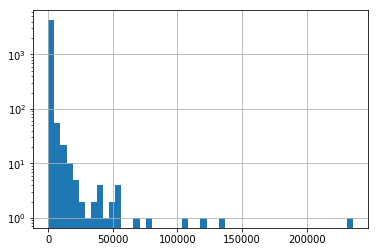

In [31]:
review_series_english.hist(bins=50,log=True);

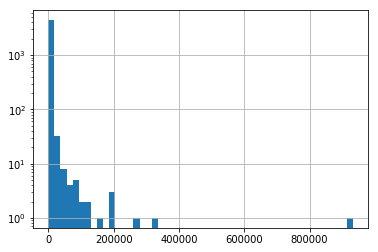

In [32]:
review_series_all.hist(bins=50,log=True);

In [48]:
csv_folder=os.path.join(parent_folder,"bulk","csv_no_text","no_preprocessing")
testing_folder=os.path.join(parent_folder,"bulk","testing")
if not os.path.exists(testing_folder):
    os.makedirs(testing_folder)

%matplotlib inline

with open(os.path.join(testing_folder,'all_reviews_early_access'),'r') as file:
    all_reviews_early_access=list(set([int(x) for x in file.read().split('\n')[:-1]]))
with open(os.path.join(testing_folder,'no_reviews_early_access'),'r') as file:
    no_reviews_early_access=list(set([int(x) for x in file.read().split('\n')[:-1]]))
with open(os.path.join(testing_folder,'logical_review_ordering'),'r') as file:
    logical_review_ordering=list(set([int(x) for x in file.read().split('\n')[:-1]]))
testing_applist=list(initial_applist_all)
for appid in all_reviews_early_access:
    testing_applist.remove(appid)
for appid in no_reviews_early_access:
    testing_applist.remove(appid)
for appid in logical_review_ordering:
    testing_applist.remove(appid)
    
guess_timestamps={}
guess_numreviews={}
for i,appid in enumerate(testing_applist,1):
    df=pd.read_csv(os.path.join(csv_folder,str(appid)+'_reviews_all.csv'))
    
    #if len(df['written_during_early_access'])==df['written_during_early_access'].sum():
    #    with open(os.path.join(testing_folder,'all_reviews_early_access'),'a') as file:
    #        file.write(str(appid)+'\n')
    #if df['written_during_early_access'].sum()==0:
    #    with open(os.path.join(testing_folder,'no_reviews_early_access'),'a') as file:
    #        file.write(str(appid)+'\n')
    #if df[df['written_during_early_access']==True]['timestamp_created'].max()<df[df['written_during_early_access']==False]['timestamp_created'].min():
    #    with open(os.path.join(testing_folder,'logical_review_ordering'),'a') as file:
    #        file.write(str(appid)+'\n')
    

    early_access_naive_cutoff=df[df['written_during_early_access']==True]['timestamp_created'].max()
    df['written_during_early_access']=df['timestamp_updated'].apply(lambda x : x<=early_access_naive_cutoff)
    if df['written_during_early_access'].sum()==0:
        with open(os.path.join(testing_folder,'no_reviews_early_access_2'),'a') as file:
            file.write(str(appid)+'\n')
    elif len(df['written_during_early_access'])==df['written_during_early_access'].sum():
        with open(os.path.join(testing_folder,'all_reviews_early_access_2'),'a') as file:
            file.write(str(appid)+'\n')
    elif df[df['written_during_early_access']==True]['timestamp_updated'].max()<df[df['written_during_early_access']==False]['timestamp_updated'].min():
        with open(os.path.join(testing_folder,'logical_review_ordering_2'),'a') as file:
            file.write(str(appid)+'\n')
    else:
        print("What?")
    #early_access_df=df[df['written_during_early_access']==True]['timestamp_created']
    #df[df['written_during_early_access']==False][df['timestamp_created']>(early_access_df.max()-24*60*60)]['timestamp_created'].hist(bins=2)
    #early_access_df.hist()
    #df[df['written_during_early_access']==False][df['timestamp_created']<=(early_access_df.max()-24*60*60)]['timestamp_created'].hist()
    #plt.show()
    #time.sleep(1)
    #print(df.head())
    #break
    
    
    #clear_output(wait=True)
    #print(str(i)+"/"+str(len(testing_applist)))
print("Done!")

Done!


In [73]:
csv_folder=os.path.join(parent_folder,"bulk","csv_no_text","no_preprocessing")
testing_folder=os.path.join(parent_folder,"bulk","testing")
if not os.path.exists(testing_folder):
    os.makedirs(testing_folder)

with open(os.path.join(testing_folder,'all_reviews_early_access'),'r') as file:
    all_reviews_early_access=list(set([int(x) for x in file.read().split('\n')[:-1]]))
with open(os.path.join(testing_folder,'no_reviews_early_access'),'r') as file:
    no_reviews_early_access=list(set([int(x) for x in file.read().split('\n')[:-1]]))
with open(os.path.join(testing_folder,'logical_review_ordering'),'r') as file:
    logical_review_ordering=list(set([int(x) for x in file.read().split('\n')[:-1]]))
testing_applist=list(initial_applist_all)
for appid in all_reviews_early_access:
    testing_applist.remove(appid)
for appid in no_reviews_early_access:
    testing_applist.remove(appid)
for appid in logical_review_ordering:
    testing_applist.remove(appid)
    
guess_timestamps={}
guess_numreviews={}
for i,appid in enumerate(testing_applist,1):
    df=pd.read_csv(os.path.join(csv_folder,str(appid)+'_reviews_all.csv'))
    
    guess_timestamps[int(appid)]=df[df['written_during_early_access']==True]['timestamp_created'].max()
    guess_numreviews[int(appid)]=len(df)

missing_dates={15540: dateutil.parser.parse('Jul 18, 2013'),
              256440: dateutil.parser.parse('Jan 9, 2014'),
              218980: dateutil.parser.parse('Jan 1, 2020')}
              #224440: dateutil.parser.parse('Jan 1, 2030'),
              #232810: dateutil.parser.parse('Jan 1, 2030'),
              #264910: dateutil.parser.parse('Jan 1, 2030'),
              #272230: dateutil.parser.parse('Jan 1, 2030'),
              #382560: dateutil.parser.parse('Jan 1, 2030')}

game_timestamps={}
for i in range(0,len(testing_applist)):
    appid=str(testing_applist[i])
    with open(os.path.join(os.path.join(parent_folder,'official_appdata'),str(appid)),'r') as file:
        temp_json=json.load(file)
    date_string=temp_json[appid]['data']['release_date']['date']
    #print(date_string)
    #if date_string != '' and date_string != 'To Be Announced':
    try:
        game_timestamps[int(appid)] = dateutil.parser.parse(date_string).replace(tzinfo=datetime.timezone.utc).timestamp()
    except:
        game_timestamps[int(appid)] = missing_dates[int(appid)].replace(tzinfo=datetime.timezone.utc).timestamp()
    #else:
    #    game_timestamps[int(appid)] = missing_dates[int(appid)].replace(tzinfo=datetime.timezone.utc).timestamp()
    #print(str(i)+"/"+str(len(testing_applist)))
print("DONE")

DONE


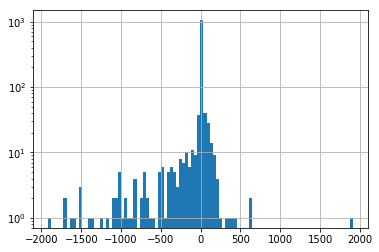

In [23]:
# Official release date is complete nonsense. For games where early access tagging exists it makes
# the most sense to just extrapolate from that, even though early access tagging itself is inconsistent
# Case study: 375230, a gap of about 6 months between leaving Early Access and the 'release date.'
# Also many games which did not change their release date after leaving Early Access.

%matplotlib inline
temp_ids=sorted(list(game_timestamps.keys()))

#for appid in temp_ids:
#    if float(game_timestamps[appid]-guess_timestamps[appid])/(24.0*60.0*60.0)>100:
#        print(str(appid)+": "+str(guess_numreviews[appid])+" - "+str(float(game_timestamps[appid]-guess_timestamps[appid])/(24.0*60.0*60.0)))
timestamp_differences=[float(game_timestamps[appid]-guess_timestamps[appid])/(24.0*60.0*60.0) for appid in temp_ids]
#Sep 26, 2016 375230: 10860
temp_series=pd.Series(timestamp_differences);
temp_series.hist(bins=100,log=True)

In [82]:
game_html_folder=os.path.join(parent_folder,"store_html","game_pages")
testing_folder=os.path.join(parent_folder,"bulk","testing")
if not os.path.exists(testing_folder):
    os.makedirs(testing_folder)

    
with open(os.path.join(testing_folder,'all_reviews_early_access'),'r') as file:
    all_reviews_early_access=list(set([int(x) for x in file.read().split('\n')[:-1]]))
with open(os.path.join(testing_folder,'all_reviews_early_access_2'),'r') as file:
    all_reviews_early_access+=list(set([int(x) for x in file.read().split('\n')[:-1]]))
with open(os.path.join(testing_folder,'logical_review_ordering'),'r') as file:
    logical_review_ordering=list(set([int(x) for x in file.read().split('\n')[:-1]]))
with open(os.path.join(testing_folder,'logical_review_ordering_2'),'r') as file:
    logical_review_ordering+=list(set([int(x) for x in file.read().split('\n')[:-1]]))

really_early_access=[]
really_not_early_access=[]
#surprising=[]
for game_html_file in os.listdir(game_html_folder):
    if int(game_html_file) in all_reviews_early_access:
        with open(os.path.join(game_html_folder,game_html_file),'r') as file:
            game_html=file.read()
        if game_html.find('<h1 class="inset">Early Access Game</h1>')==-1 and game_html.find('<h1 class="inset">Early Access Software</h1>')==-1:
            #print("Surprise! "+game_html_file+" not in early access")
            #if int(game_html_file) in guess_numreviews:
            #    print(guess_numreviews[int(game_html_file)])
            #surprising.append(int(game_html_file))
            really_not_early_access.append(int(game_html_file))
        else:
            really_early_access.append(int(game_html_file))
    elif int(game_html_file) in logical_review_ordering:
        with open(os.path.join(game_html_folder,game_html_file),'r') as file:
            game_html=file.read()
        if game_html.find('<h1 class="inset">Early Access Game</h1>')!=-1 or game_html.find('<h1 class="inset">Early Access Software</h1>')!=-1:
            really_early_access.append(int(game_html_file))
        else:
            really_not_early_access.append(int(game_html_file))
with open(os.path.join(testing_folder,'still_in_early_access_FINAL'),'w') as file:
    for x in really_early_access:
        file.write(str(x)+'\n')
with open(os.path.join(testing_folder,'out_of_early_access_FINAL'),'w') as file:
    for x in really_not_early_access:
        file.write(str(x)+'\n')

print("Done!")

Done!


In [111]:
csv_folder=os.path.join(parent_folder,"bulk","csv_no_text","no_preprocessing")
csv_english_folder=os.path.join(parent_folder,"bulk","csv_english","no_preprocessing")
csv_out_folder=os.path.join(parent_folder,"bulk","csv_no_text","early_access_standardized")
csv_out_english_folder=os.path.join(parent_folder,"bulk","csv_english","early_access_standardized")
testing_folder=os.path.join(parent_folder,"bulk","testing")

if not os.path.exists(csv_out_folder):
    os.makedirs(csv_out_folder)
if not os.path.exists(csv_out_english_folder):
    os.makedirs(csv_out_english_folder)
    
with open(os.path.join(testing_folder,'all_reviews_early_access'),'r') as file:
    all_reviews_early_access=set([int(x) for x in file.read().split('\n')[:-1]])
with open(os.path.join(testing_folder,'all_reviews_early_access_2'),'r') as file:
    all_reviews_early_access=all_reviews_early_access | set([int(x) for x in file.read().split('\n')[:-1]])
with open(os.path.join(testing_folder,'still_in_early_access_FINAL'),'r') as file:
    all_reviews_early_access=all_reviews_early_access | set([int(x) for x in file.read().split('\n')[:-1]])
with open(os.path.join(testing_folder,'logical_review_ordering'),'r') as file:
    logical_review_ordering=set([int(x) for x in file.read().split('\n')[:-1]])
with open(os.path.join(testing_folder,'logical_review_ordering_2'),'r') as file:
    logical_review_ordering=logical_review_ordering | set([int(x) for x in file.read().split('\n')[:-1]])
logical_review_ordering = logical_review_ordering - all_reviews_early_access

for i,appid in enumerate(logical_review_ordering,1):
    df=pd.read_csv(os.path.join(csv_folder,str(appid)+'_reviews_all.csv'))

    early_access_naive_cutoff=df[df['written_during_early_access']==True]['timestamp_created'].max()
    
    df['written_during_early_access']=df['timestamp_updated'].apply(lambda x : x<=early_access_naive_cutoff)
    df['edited_from_early_access']=df.apply(lambda x : ((not x['written_during_early_access']) and 
                                                         x['timestamp_created']<=early_access_naive_cutoff),axis=1)
    df.to_csv(os.path.join(csv_out_folder,str(appid)+'_reviews_all.csv'),index=False)
    
    if os.path.exists(os.path.join(csv_english_folder,str(appid)+'_reviews_english.csv')):
        df=pd.read_csv(os.path.join(csv_english_folder,str(appid)+'_reviews_english.csv'))
        df['written_during_early_access']=df['timestamp_updated'].apply(lambda x : x<=early_access_naive_cutoff)
        df['edited_from_early_access']=df.apply(lambda x : ((not x['written_during_early_access']) and 
                                                         x['timestamp_created']<=early_access_naive_cutoff),axis=1)
        df.to_csv(os.path.join(csv_out_english_folder,str(appid)+'_reviews_english.csv'),index=False)
    print("A: "+str(i)+"/"+str(len(logical_review_ordering)))
    
for i,appid in enumerate(all_reviews_early_access,1):
    df=pd.read_csv(os.path.join(csv_folder,str(appid)+'_reviews_all.csv'))

    df['written_during_early_access']=df['written_during_early_access'].apply(lambda x : True)
    df['edited_from_early_access']=df['written_during_early_access'].apply(lambda x : False)
    df.to_csv(os.path.join(csv_out_folder,str(appid)+'_reviews_all.csv'),index=False)
    
    if os.path.exists(os.path.join(csv_english_folder,str(appid)+'_reviews_english.csv')):
        df=pd.read_csv(os.path.join(csv_english_folder,str(appid)+'_reviews_english.csv'))
        df['written_during_early_access']=df['written_during_early_access'].apply(lambda x : True)
        df['edited_from_early_access']=df['written_during_early_access'].apply(lambda x : False)
        df.to_csv(os.path.join(csv_out_english_folder,str(appid)+'_reviews_english.csv'),index=False)
    print("B: "+str(i)+"/"+str(len(all_reviews_early_access)))

print("Done!")

    

A: 1/1940
A: 2/1940
A: 3/1940
A: 4/1940
A: 5/1940
A: 6/1940
A: 7/1940
A: 8/1940
A: 9/1940
A: 10/1940
A: 11/1940
A: 12/1940
A: 13/1940
A: 14/1940
A: 15/1940
A: 16/1940
A: 17/1940
A: 18/1940
A: 19/1940
A: 20/1940
A: 21/1940
A: 22/1940
A: 23/1940
A: 24/1940
A: 25/1940
A: 26/1940
A: 27/1940
A: 28/1940
A: 29/1940
A: 30/1940
A: 31/1940
A: 32/1940
A: 33/1940
A: 34/1940
A: 35/1940
A: 36/1940
A: 37/1940
A: 38/1940
A: 39/1940
A: 40/1940
A: 41/1940
A: 42/1940
A: 43/1940
A: 44/1940
A: 45/1940
A: 46/1940
A: 47/1940
A: 48/1940
A: 49/1940
A: 50/1940
A: 51/1940
A: 52/1940
A: 53/1940
A: 54/1940
A: 55/1940
A: 56/1940
A: 57/1940
A: 58/1940
A: 59/1940
A: 60/1940
A: 61/1940
A: 62/1940
A: 63/1940
A: 64/1940
A: 65/1940
A: 66/1940
A: 67/1940
A: 68/1940
A: 69/1940
A: 70/1940
A: 71/1940
A: 72/1940
A: 73/1940
A: 74/1940
A: 75/1940
A: 76/1940
A: 77/1940
A: 78/1940
A: 79/1940
A: 80/1940
A: 81/1940
A: 82/1940
A: 83/1940
A: 84/1940
A: 85/1940
A: 86/1940
A: 87/1940
A: 88/1940
A: 89/1940
A: 90/1940
A: 91/1940
A: 92/19

A: 696/1940
A: 697/1940
A: 698/1940
A: 699/1940
A: 700/1940
A: 701/1940
A: 702/1940
A: 703/1940
A: 704/1940
A: 705/1940
A: 706/1940
A: 707/1940
A: 708/1940
A: 709/1940
A: 710/1940
A: 711/1940
A: 712/1940
A: 713/1940
A: 714/1940
A: 715/1940
A: 716/1940
A: 717/1940
A: 718/1940
A: 719/1940
A: 720/1940
A: 721/1940
A: 722/1940
A: 723/1940
A: 724/1940
A: 725/1940
A: 726/1940
A: 727/1940
A: 728/1940
A: 729/1940
A: 730/1940
A: 731/1940
A: 732/1940
A: 733/1940
A: 734/1940
A: 735/1940
A: 736/1940
A: 737/1940
A: 738/1940
A: 739/1940
A: 740/1940
A: 741/1940
A: 742/1940
A: 743/1940
A: 744/1940
A: 745/1940
A: 746/1940
A: 747/1940
A: 748/1940
A: 749/1940
A: 750/1940
A: 751/1940
A: 752/1940
A: 753/1940
A: 754/1940
A: 755/1940
A: 756/1940
A: 757/1940
A: 758/1940
A: 759/1940
A: 760/1940
A: 761/1940
A: 762/1940
A: 763/1940
A: 764/1940
A: 765/1940
A: 766/1940
A: 767/1940
A: 768/1940
A: 769/1940
A: 770/1940
A: 771/1940
A: 772/1940
A: 773/1940
A: 774/1940
A: 775/1940
A: 776/1940
A: 777/1940
A: 778/1940
A: 7

A: 1351/1940
A: 1352/1940
A: 1353/1940
A: 1354/1940
A: 1355/1940
A: 1356/1940
A: 1357/1940
A: 1358/1940
A: 1359/1940
A: 1360/1940
A: 1361/1940
A: 1362/1940
A: 1363/1940
A: 1364/1940
A: 1365/1940
A: 1366/1940
A: 1367/1940
A: 1368/1940
A: 1369/1940
A: 1370/1940
A: 1371/1940
A: 1372/1940
A: 1373/1940
A: 1374/1940
A: 1375/1940
A: 1376/1940
A: 1377/1940
A: 1378/1940
A: 1379/1940
A: 1380/1940
A: 1381/1940
A: 1382/1940
A: 1383/1940
A: 1384/1940
A: 1385/1940
A: 1386/1940
A: 1387/1940
A: 1388/1940
A: 1389/1940
A: 1390/1940
A: 1391/1940
A: 1392/1940
A: 1393/1940
A: 1394/1940
A: 1395/1940
A: 1396/1940
A: 1397/1940
A: 1398/1940
A: 1399/1940
A: 1400/1940
A: 1401/1940
A: 1402/1940
A: 1403/1940
A: 1404/1940
A: 1405/1940
A: 1406/1940
A: 1407/1940
A: 1408/1940
A: 1409/1940
A: 1410/1940
A: 1411/1940
A: 1412/1940
A: 1413/1940
A: 1414/1940
A: 1415/1940
A: 1416/1940
A: 1417/1940
A: 1418/1940
A: 1419/1940
A: 1420/1940
A: 1421/1940
A: 1422/1940
A: 1423/1940
A: 1424/1940
A: 1425/1940
A: 1426/1940
A: 1427/1940

B: 54/2995
B: 55/2995
B: 56/2995
B: 57/2995
B: 58/2995
B: 59/2995
B: 60/2995
B: 61/2995
B: 62/2995
B: 63/2995
B: 64/2995
B: 65/2995
B: 66/2995
B: 67/2995
B: 68/2995
B: 69/2995
B: 70/2995
B: 71/2995
B: 72/2995
B: 73/2995
B: 74/2995
B: 75/2995
B: 76/2995
B: 77/2995
B: 78/2995
B: 79/2995
B: 80/2995
B: 81/2995
B: 82/2995
B: 83/2995
B: 84/2995
B: 85/2995
B: 86/2995
B: 87/2995
B: 88/2995
B: 89/2995
B: 90/2995
B: 91/2995
B: 92/2995
B: 93/2995
B: 94/2995
B: 95/2995
B: 96/2995
B: 97/2995
B: 98/2995
B: 99/2995
B: 100/2995
B: 101/2995
B: 102/2995
B: 103/2995
B: 104/2995
B: 105/2995
B: 106/2995
B: 107/2995
B: 108/2995
B: 109/2995
B: 110/2995
B: 111/2995
B: 112/2995
B: 113/2995
B: 114/2995
B: 115/2995
B: 116/2995
B: 117/2995
B: 118/2995
B: 119/2995
B: 120/2995
B: 121/2995
B: 122/2995
B: 123/2995
B: 124/2995
B: 125/2995
B: 126/2995
B: 127/2995
B: 128/2995
B: 129/2995
B: 130/2995
B: 131/2995
B: 132/2995
B: 133/2995
B: 134/2995
B: 135/2995
B: 136/2995
B: 137/2995
B: 138/2995
B: 139/2995
B: 140/2995
B:

B: 746/2995
B: 747/2995
B: 748/2995
B: 749/2995
B: 750/2995
B: 751/2995
B: 752/2995
B: 753/2995
B: 754/2995
B: 755/2995
B: 756/2995
B: 757/2995
B: 758/2995
B: 759/2995
B: 760/2995
B: 761/2995
B: 762/2995
B: 763/2995
B: 764/2995
B: 765/2995
B: 766/2995
B: 767/2995
B: 768/2995
B: 769/2995
B: 770/2995
B: 771/2995
B: 772/2995
B: 773/2995
B: 774/2995
B: 775/2995
B: 776/2995
B: 777/2995
B: 778/2995
B: 779/2995
B: 780/2995
B: 781/2995
B: 782/2995
B: 783/2995
B: 784/2995
B: 785/2995
B: 786/2995
B: 787/2995
B: 788/2995
B: 789/2995
B: 790/2995
B: 791/2995
B: 792/2995
B: 793/2995
B: 794/2995
B: 795/2995
B: 796/2995
B: 797/2995
B: 798/2995
B: 799/2995
B: 800/2995
B: 801/2995
B: 802/2995
B: 803/2995
B: 804/2995
B: 805/2995
B: 806/2995
B: 807/2995
B: 808/2995
B: 809/2995
B: 810/2995
B: 811/2995
B: 812/2995
B: 813/2995
B: 814/2995
B: 815/2995
B: 816/2995
B: 817/2995
B: 818/2995
B: 819/2995
B: 820/2995
B: 821/2995
B: 822/2995
B: 823/2995
B: 824/2995
B: 825/2995
B: 826/2995
B: 827/2995
B: 828/2995
B: 8

B: 1401/2995
B: 1402/2995
B: 1403/2995
B: 1404/2995
B: 1405/2995
B: 1406/2995
B: 1407/2995
B: 1408/2995
B: 1409/2995
B: 1410/2995
B: 1411/2995
B: 1412/2995
B: 1413/2995
B: 1414/2995
B: 1415/2995
B: 1416/2995
B: 1417/2995
B: 1418/2995
B: 1419/2995
B: 1420/2995
B: 1421/2995
B: 1422/2995
B: 1423/2995
B: 1424/2995
B: 1425/2995
B: 1426/2995
B: 1427/2995
B: 1428/2995
B: 1429/2995
B: 1430/2995
B: 1431/2995
B: 1432/2995
B: 1433/2995
B: 1434/2995
B: 1435/2995
B: 1436/2995
B: 1437/2995
B: 1438/2995
B: 1439/2995
B: 1440/2995
B: 1441/2995
B: 1442/2995
B: 1443/2995
B: 1444/2995
B: 1445/2995
B: 1446/2995
B: 1447/2995
B: 1448/2995
B: 1449/2995
B: 1450/2995
B: 1451/2995
B: 1452/2995
B: 1453/2995
B: 1454/2995
B: 1455/2995
B: 1456/2995
B: 1457/2995
B: 1458/2995
B: 1459/2995
B: 1460/2995
B: 1461/2995
B: 1462/2995
B: 1463/2995
B: 1464/2995
B: 1465/2995
B: 1466/2995
B: 1467/2995
B: 1468/2995
B: 1469/2995
B: 1470/2995
B: 1471/2995
B: 1472/2995
B: 1473/2995
B: 1474/2995
B: 1475/2995
B: 1476/2995
B: 1477/2995

B: 2039/2995
B: 2040/2995
B: 2041/2995
B: 2042/2995
B: 2043/2995
B: 2044/2995
B: 2045/2995
B: 2046/2995
B: 2047/2995
B: 2048/2995
B: 2049/2995
B: 2050/2995
B: 2051/2995
B: 2052/2995
B: 2053/2995
B: 2054/2995
B: 2055/2995
B: 2056/2995
B: 2057/2995
B: 2058/2995
B: 2059/2995
B: 2060/2995
B: 2061/2995
B: 2062/2995
B: 2063/2995
B: 2064/2995
B: 2065/2995
B: 2066/2995
B: 2067/2995
B: 2068/2995
B: 2069/2995
B: 2070/2995
B: 2071/2995
B: 2072/2995
B: 2073/2995
B: 2074/2995
B: 2075/2995
B: 2076/2995
B: 2077/2995
B: 2078/2995
B: 2079/2995
B: 2080/2995
B: 2081/2995
B: 2082/2995
B: 2083/2995
B: 2084/2995
B: 2085/2995
B: 2086/2995
B: 2087/2995
B: 2088/2995
B: 2089/2995
B: 2090/2995
B: 2091/2995
B: 2092/2995
B: 2093/2995
B: 2094/2995
B: 2095/2995
B: 2096/2995
B: 2097/2995
B: 2098/2995
B: 2099/2995
B: 2100/2995
B: 2101/2995
B: 2102/2995
B: 2103/2995
B: 2104/2995
B: 2105/2995
B: 2106/2995
B: 2107/2995
B: 2108/2995
B: 2109/2995
B: 2110/2995
B: 2111/2995
B: 2112/2995
B: 2113/2995
B: 2114/2995
B: 2115/2995

B: 2670/2995
B: 2671/2995
B: 2672/2995
B: 2673/2995
B: 2674/2995
B: 2675/2995
B: 2676/2995
B: 2677/2995
B: 2678/2995
B: 2679/2995
B: 2680/2995
B: 2681/2995
B: 2682/2995
B: 2683/2995
B: 2684/2995
B: 2685/2995
B: 2686/2995
B: 2687/2995
B: 2688/2995
B: 2689/2995
B: 2690/2995
B: 2691/2995
B: 2692/2995
B: 2693/2995
B: 2694/2995
B: 2695/2995
B: 2696/2995
B: 2697/2995
B: 2698/2995
B: 2699/2995
B: 2700/2995
B: 2701/2995
B: 2702/2995
B: 2703/2995
B: 2704/2995
B: 2705/2995
B: 2706/2995
B: 2707/2995
B: 2708/2995
B: 2709/2995
B: 2710/2995
B: 2711/2995
B: 2712/2995
B: 2713/2995
B: 2714/2995
B: 2715/2995
B: 2716/2995
B: 2717/2995
B: 2718/2995
B: 2719/2995
B: 2720/2995
B: 2721/2995
B: 2722/2995
B: 2723/2995
B: 2724/2995
B: 2725/2995
B: 2726/2995
B: 2727/2995
B: 2728/2995
B: 2729/2995
B: 2730/2995
B: 2731/2995
B: 2732/2995
B: 2733/2995
B: 2734/2995
B: 2735/2995
B: 2736/2995
B: 2737/2995
B: 2738/2995
B: 2739/2995
B: 2740/2995
B: 2741/2995
B: 2742/2995
B: 2743/2995
B: 2744/2995
B: 2745/2995
B: 2746/2995

In [55]:
print(all_reviews_early_access[-1])
print(logical_review_ordering[-1])

662910
325630


In [63]:
print('abc'.split('_'))

['abc']


In [70]:
with open(os.path.join(game_html_folder,'561390'),'r') as file:
    game_html=file.read()
#print(game_html)
print(game_html.find('<h1 class="inset">Early Access Software</h1>'))

72142


In [75]:
print(guess_numreviews)

{25000: 4428, 116100: 327, 200150: 204, 206500: 8906, 207140: 22249, 211820: 80958, 214190: 4323, 214420: 8607, 215550: 319, 215830: 2651, 218980: 157, 219990: 27568, 220200: 53845, 221100: 194166, 223410: 647, 223830: 2787, 224500: 3194, 224740: 772, 226100: 696, 226860: 7756, 227060: 379, 227160: 1428, 227860: 4998, 227940: 69345, 228380: 10807, 229580: 925, 230070: 1994, 230190: 4616, 230230: 11388, 230290: 6029, 230310: 318, 230860: 675, 232090: 67397, 232450: 1161, 233450: 33310, 233610: 4171, 233680: 353, 233860: 8280, 233980: 6261, 235380: 4430, 235800: 4597, 236110: 14352, 236150: 3704, 237350: 257, 237870: 5496, 238240: 2634, 239840: 1908, 240760: 7498, 241240: 1044, 242130: 594, 242680: 9997, 242760: 114805, 242840: 1339, 242860: 26144, 243970: 3760, 244030: 1484, 244210: 17118, 244450: 13014, 244590: 1231, 244850: 67280, 246070: 753, 246090: 3857, 246110: 1529, 246620: 21046, 246660: 6, 246760: 1290, 246900: 7171, 246920: 124, 246940: 365, 247080: 14488, 247730: 17601, 24839

/home/qpc0/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/qpc0/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:54: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


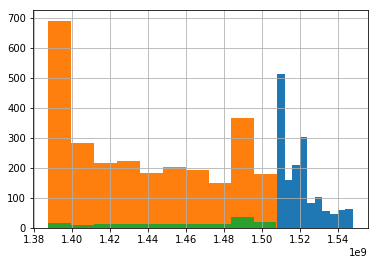

KeyboardInterrupt: 

In [116]:
csv_folder=os.path.join(parent_folder,"bulk","csv_no_text","no_preprocessing")
testing_folder=os.path.join(parent_folder,"bulk","testing")
if not os.path.exists(testing_folder):
    os.makedirs(testing_folder)

%matplotlib inline

with open(os.path.join(testing_folder,'all_reviews_early_access'),'r') as file:
    all_reviews_early_access=list(set([int(x) for x in file.read().split('\n')[:-1]]))
with open(os.path.join(testing_folder,'no_reviews_early_access'),'r') as file:
    no_reviews_early_access=list(set([int(x) for x in file.read().split('\n')[:-1]]))
with open(os.path.join(testing_folder,'logical_review_ordering'),'r') as file:
    logical_review_ordering=list(set([int(x) for x in file.read().split('\n')[:-1]]))
testing_applist=list(initial_applist_all)
for appid in all_reviews_early_access:
    testing_applist.remove(appid)
for appid in no_reviews_early_access:
    testing_applist.remove(appid)
for appid in logical_review_ordering:
    testing_applist.remove(appid)
    
guess_timestamps={}
guess_numreviews={}
for i,appid in enumerate(testing_applist,1):
    df=pd.read_csv(os.path.join(csv_folder,str(appid)+'_reviews_all.csv'))
    
    #if len(df['written_during_early_access'])==df['written_during_early_access'].sum():
    #    with open(os.path.join(testing_folder,'all_reviews_early_access'),'a') as file:
    #        file.write(str(appid)+'\n')
    #if df['written_during_early_access'].sum()==0:
    #    with open(os.path.join(testing_folder,'no_reviews_early_access'),'a') as file:
    #        file.write(str(appid)+'\n')
    #if df[df['written_during_early_access']==True]['timestamp_created'].max()<df[df['written_during_early_access']==False]['timestamp_created'].min():
    #    with open(os.path.join(testing_folder,'logical_review_ordering'),'a') as file:
    #        file.write(str(appid)+'\n')
    

    early_access_naive_cutoff=df[df['written_during_early_access']==True]['timestamp_created'].max()
    df['written_during_early_access']=df['timestamp_updated'].apply(lambda x : x<=early_access_naive_cutoff)
    if df['written_during_early_access'].sum()==0:
        with open(os.path.join(testing_folder,'no_reviews_early_access_2'),'a') as file:
            file.write(str(appid)+'\n')
    elif len(df['written_during_early_access'])==df['written_during_early_access'].sum():
        with open(os.path.join(testing_folder,'all_reviews_early_access_2'),'a') as file:
            file.write(str(appid)+'\n')
    elif df[df['written_during_early_access']==True]['timestamp_updated'].max()<df[df['written_during_early_access']==False]['timestamp_updated'].min():
        with open(os.path.join(testing_folder,'logical_review_ordering_2'),'a') as file:
            file.write(str(appid)+'\n')
    else:
        print("What?")
    early_access_df=df[df['written_during_early_access']==True]['timestamp_created']
    df[df['written_during_early_access']==False][df['timestamp_created']>(early_access_df.max()-24*60*60)]['timestamp_created'].hist()
    early_access_df.hist()
    df[df['written_during_early_access']==False][df['timestamp_created']<=(early_access_df.max()-24*60*60)]['timestamp_created'].hist()
    plt.show()
    time.sleep(1)
    #print(df.head())
    #break
    
    
    clear_output(wait=True)
    print(str(i)+"/"+str(len(testing_applist)))
print("Done!")